<a href="https://colab.research.google.com/github/Alejandro3009/ADA-Informes/blob/main/Arbol_de_busqueda_optimo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Arbol de busqueda optimo**

#1. Descripcion del problema

###**Arbol de busqueda optimo**

El problema del **arbol de busqueda optimo** como su nombre bien dice, es el problema de encontrar el **arbol binario optimo** para reducir la cantidad de nodos por los que uno tiene que pasar para encontrar una clave.

###**Problema de optimizacion**

El problema del **arbol de busqueda optimo** es un **problema de optimizacion**, estos problemas se basan en la idea de encontrar **metodos** o **maneras de programar algoritmos**, que reduzcan una de dos cosas: el tiempo de ejecucion o el consumo de recursos.

Este tipo de problemas son muy comunes, y el saber resolverlos es muy importante para un buen diseño de un programa.

#2. Descripcion del algoritmo

El algoritmo tiene multiples maneras para ser diseñado, cada forma tiene sus ventajas y desventajas.

###**Diseño dinamico**

Primero nos centraremos en el diseño de **programcion dinamica**.

* **programacion dinamica:** la programacion dinamica es un *estilo de diseño* similar al **divide y venceras**, de divir el **problema en sub-problemas** mas pequeños para luego con las soluciones de los sub-problemas resolver el problema original, solo que en este caso mantenemos un **listado de resultados obtenidos**, para asi no tener que volver a resolver un problema ya resuelto

para mostrar las bases del algoritmo se tiene el siguiente esquema

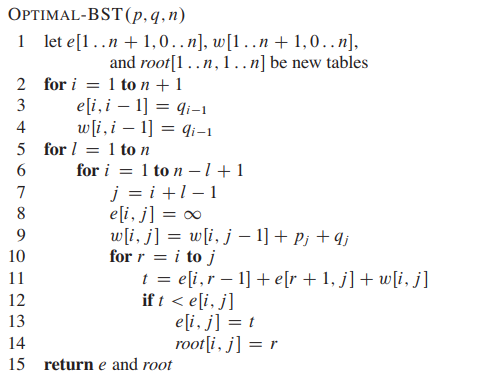

y a continuacion su implementacion

In [13]:
subProblemas = 0
def ABB_Din(claves,frec,n,verbose=False):
  costo = [[0 for x in range(n)] for y in range(n)]   #se inicializa una matriz para poder almacenar los costos calculados
  global subProblemas

  for i in range(n):  #se guardan las frecuencias del arreglo original y se guardan en la matriz de memoria
    costo[i][i] = frec[i]

  for l in range(2,n+1):
    for i in range(n - l+1):
      j = i + l - 1

      if verbose:
        print(f"se calcula la suma de las frecuencias")
      suma = 0
      for k in range(i, j+1):  #se suman las frecuencias
        suma += frec[k]

      if verbose:
        print(f"la suma de las frecuencias es: {suma}")

      if i >= n or j >=n:  #caso base
        break
      costo[i][j] = float("inf")   #se inicializa la posición de costo en donde se va a ir almacenando el costo calculado

      for r in range(i,j+1):  #se comienza a comparar en busca del menor costo
        if verbose:
          print("se comienza a buscar los valores más optimos")
        subProblemas += 1
        aux = 0
        if r > i:
          if verbose:
            print(f"comparando si {r} es mayor a {i}")
          aux += costo[i][r-1]
          if verbose:
            print(f"nuevo costo minimo: {aux}")
        if r < j:
          if verbose:
            print(f"comparando si {r+1} es menor a {j}")
          aux += costo[r+1][j]
        aux += suma
        if verbose:
          print(f"nuevo costo minimo: {aux}")
        if aux < costo[i][j]:
          costo[i][j] = aux

        if verbose:
          print(f"subproblemas terminados, nuevo costo mínimo: {costo[0][n-1]}\n")

  return costo[0][n-1]

claves,frec,n = optimal_bst_instance_generator(20)
n = len(claves)
ABB_Din(claves,frec,n)

1.4011785857120989

###**Diseño recursivo**

A continuacion veremos el diseño 

* **Recursividad:** la recursividad es una manera alternativa a las iteraciones, en este método nosotros realizamos un mismo procedimiento $X$ cantidad de veces hasta llegar a un punto deseado, en ese punto empezamos a devolvernos y a resolver el problema. 

a continuacion la implementacion

In [11]:
recursiones = 0
def ABB_Cost(frec, err, i, j, verbose=False):
  global recursiones   #contador para las llamadas recursivas

  if len(frec) == 0:  #return para los casos base, cuando entran arreglos de tamaño 0 o 1
      return 0
  if len(frec) == 1:
    return frec[0]

  if verbose:
    print(f"se suman las frecuencias del arreglo {frec}")

  aux = 0   #se suman todas las frecuencias
  for k in range(i, j):
    aux += (frec[k]+err[k]) * (k+1)
  
  if verbose:
    print(f"la suma de las frecuencias es {aux}")

  min = len(frec)   #se inicia una variable con infinito para luego almacenar el costo minimo
                    #aca hay un error pero no se que lo provoca, y es que el minimo se esta sumando al costo

  for r in range(i, j):   #se calcula el costo minimo de los subproblemas que se generan
    if verbose:
      print(f"se calculan los costos minimos de los arreglos {frec[i:r-1]} y {frec[r+1:j]} ")
    recursiones += 2
    costo = ABB_Cost(frec, err, i, r - 1, verbose) + ABB_Cost(frec, err, r + 1, j, verbose)
    if costo < min:
      if verbose:
        print(f"se busca el valor menor entre {min} y {costo} ")
      min = costo  #en caso de encontrar un costo menor al ya guardado se cambia

  if verbose:
    print(f"el costo esperado es de {min+aux}")
    print("\n")

  return min + aux

claves,frec,p = optimal_bst_instance_generator(10)
n = len(claves)
ABB_Cost(frec,p,0,5)

11.033831946764879

##2.1. Ejecucion del verbose

A continuación, hay otra ejecución del código **bottom up** esta vez mostrando el paso a paso de este, esta opción se habilita cuando $verbose = True$.

In [15]:
claves,frec,n = optimal_bst_instance_generator(20)
n = len(claves)
print("claves: ",claves)
print("frecuencias: ",frec)
ABB_Din(claves,frec,n,True)

Se han truncado las últimas 5000 líneas del flujo de salida.
comparando si 9 es menor a 14
nuevo costo minimo: 0.8312047899236433
subproblemas terminados, nuevo costo mínimo: 0

se comienza a buscar los valores más optimos
comparando si 9 es mayor a 4
nuevo costo minimo: 0.14105143446686846
comparando si 10 es menor a 14
nuevo costo minimo: 0.7700713295774126
subproblemas terminados, nuevo costo mínimo: 0

se comienza a buscar los valores más optimos
comparando si 10 es mayor a 4
nuevo costo minimo: 0.24020223022424841
comparando si 11 es menor a 14
nuevo costo minimo: 0.7549838981160956
subproblemas terminados, nuevo costo mínimo: 0

se comienza a buscar los valores más optimos
comparando si 11 es mayor a 4
nuevo costo minimo: 0.3395466796197588
comparando si 12 es menor a 14
nuevo costo minimo: 0.7738830164760807
subproblemas terminados, nuevo costo mínimo: 0

se comienza a buscar los valores más optimos
comparando si 12 es mayor a 4
nuevo costo minimo: 0.4423263796718187
comparando 

1.9316711425609232

#3. Tiempo de ejecucción

### Optimal BST recursivo

Al ser una implementación recursiva muy probablemente se resuelvan los mismos subproblemas que se encuentren dentro de los ${2n\choose n}\frac{1}{n+1}$ posibles árboles que pueden resultar. Esto resulta en la complejidad de la versión recursia en $O(2^n)$. La complejidad espacial de esta versión es de $O(1)$, puesto que no es necesario utilizar estructuras auxiliares para almacenar los datos.

### Optimal BST dinámico

La versión dinámica no sufre de los problemas de su contraparte recursiva, puesto que guarda en la memoria los valores que ya ha calculado, por lo que resuelve los subproblemas una única vez. Debido a que el algoritmo necesita tener tres ciclos anidados $for$ que van hasta $n$, lo que nos da un tiempo de ejecucción de $O(n^3)$, el tiempo de ejecucción no influye puesto que estos tienen una complejidad de $O(n)$. Existe una forma de reducir el tiempo de ejecucción de esta versión a un $O(n^2)$, el cuál requiere de utilizar el "Teorema de Knuth", el cuál restringe valores para que no se tengan que realizar iteraciones innecesarias. La complejidad espacial de esta versión puesto que utiliza una matriz auxiliar para ir almacenando los resultados de los subproblemas ya calculados nos da $O(n^2)$.

# 4. Correctitud
El problema se puede modelar como una serie de subproblemas que se pueden resolver de manera independiente, que luego formarán parte de la solución al problema original.

El costo de un árbol es igual al costo de sus subárboles más la probabilidad de visitar el nodo raíz. Considerando esto, se puede decir que es posible encontrar el costo mínimo de un árbol calculando el costo de cada subárbol por separado y luego sumándole la probabilidad.

El costo mínimo estaría dado por la siguiente función:

Costo de i a j = costo de subárbol 1 + costo de subárbol 2 + $\sum\limits_{}$
$Costo_{i,j} = subárbol 1 + subárbol 2 + \sum\limits_{k=1}^j$ $probabilidad$ $de$ $j$

## Teorema

El algoritmo recibe un rango $i,j$ y encuentra el costo mínimo posible para un árbol binario formado por los elementos dentro de ese rango.

## Prueba del teorema

En cada iteración se calcula el costo mínimo de un arbol con $j - i$ elementos y se guarda en una matriz con la solución de los subproblemas. Probaremos la siguiente propiedad invariante:
> Al comienzo de cada iteración, la solución de los subárboles ya se encuentra en la matriz. 

Sólo es necesario sumar las soluciones y la probabilidad de visitar el nodo raíz.

## Inicialización

Al comienzo de la primera iteración, donde $i = 0$ y $j = 1$, el subproblema será el nodo en la posición $i$ o $j$ del arreglo. Como sólo es un nodo hoja, la solución se encuentra en la diagonal de la matriz, y es igual a la probabilidad de que la clave sea buscada. Por lo tanto, se cumple la propiedad.
[0:37]
## Mantención

Aplicando inducción, asumimos que al comienzo de cada iteración se cumple la propiedad.

Durante la iteración, se busca el costo mínimo de un subárbol comparando el costo de cada nodo si éste fuese raíz.

Al terminar la iteración, el valor en la posición [i][j] de la matriz corresponde a la solución del rango de elementos $i,j$ y se sigue cumpliendo la propiedad invariante.

El problema original corresponde al caso donde $i = 0$ y $j =$ *largo del arreglo inicial*, es decir, cuando el rango incluye todos los elementos del arreglo.
Por lo tanto, si se resuelven los subproblemas, el problema original también quedaría resuelto.

#5. Experimentos

A continuacion se realizara una serie de experimentos para comparar el rendimiento de la implementacion **dinaminca bottom up** y la implementacion **recursiva**.

##5.1. tiempo de ejecucion

En este experimento se comparar el tiempo de ejecucion de la implentacion **bottom up** y la **recursiva**, para esto el algortimo va a crear una lista de precios aleatoria y va ejecutar ambas implementaciones $10$ veces, de entre las cuales va a elegir la mejor y graficarla.

* tiempo de ejecucion de **bottom up** (la gráfica azul)
* Tiempo de ejecucion de **recursiva** (la gráfica naranja)

para un problema que tiene un tamaño $n \in [5,20]$

In [ ]:
import matplotlib.pyplot as plt
import random
from timeit import repeat

x = []
y1 = []
y2 = []

for n in range(1,15):
  claves,frec,p = optimal_bst_instance_generator(n)
  verbose = False

  t1 = repeat(setup="from __main__ import ABB_Cost", stmt=f"ABB_Cost({frec},{p},{0},{n})", repeat = 1, number = 10)
  t2 = repeat(setup="from __main__ import ABB_Din", stmt=f"ABB_Din({claves},{frec},{n})", repeat = 1, number = 10)

  x.append(n)
  y1.append(t1)
  y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)

plt.legend(["OBST Recursivo", "OBST Dinámico"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

In [2]:
import random
import numpy as np

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = arr[n:] # Probabilidad de las claves ficticias
    return keys, p, q
    
keys, p, q = optimal_bst_instance_generator(10)